                                               Quote  Polarity  Subjectivity
0  “The world as we have created it is a process ...  0.000000      0.000000
1  “It is our choices, Harry, that show what we t...  0.300000      0.750000
2  “There are only two ways to live your life. On...  0.003788      0.625000
3  “The person, be it gentleman or lady, who has ... -0.050000      0.800000
4  “Imperfection is beauty, madness is genius and... -0.277778      0.833333


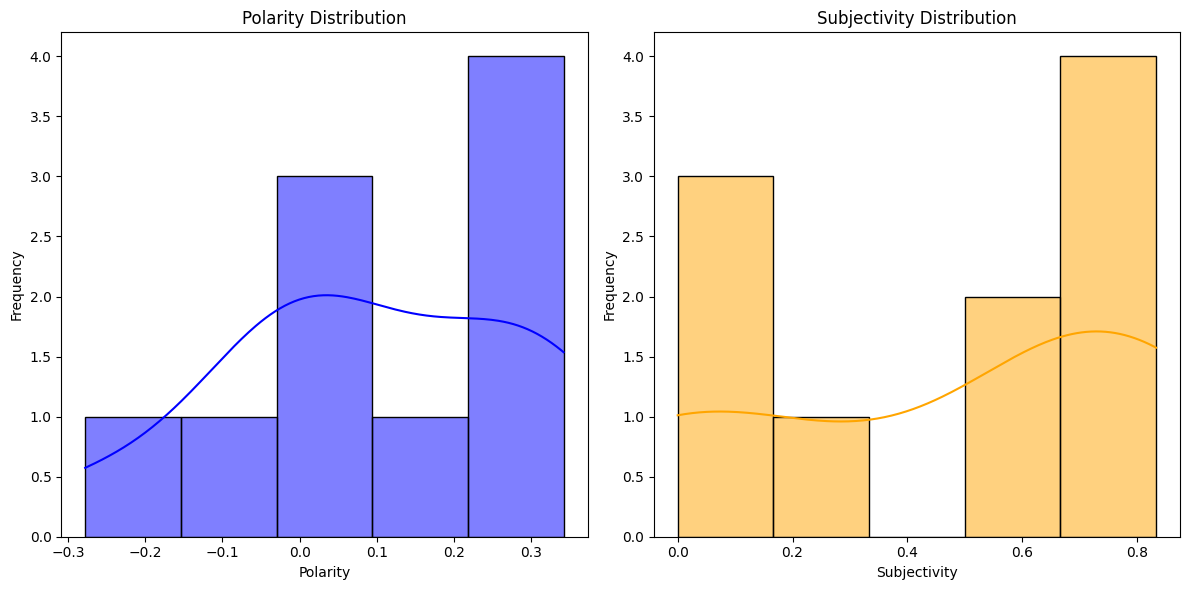


Number of positive quotes: 6
Number of negative quotes: 2
Number of neutral quotes: 2


In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a pandas DataFrame
df = pd.read_csv("quotes.csv")

# Function to get the sentiment of a quote
def get_sentiment(text):
    blob = TextBlob(text)
    # Polarity: -1 (negative) to +1 (positive)
    polarity = blob.sentiment.polarity
    # Subjectivity: 0 (objective) to 1 (subjective)
    subjectivity = blob.sentiment.subjectivity
    return polarity, subjectivity

# Apply the sentiment function to each quote in the dataframe
df[['Polarity', 'Subjectivity']] = df['Quote'].apply(lambda x: pd.Series(get_sentiment(x)))

# Show the first few rows to check
print(df[['Quote', 'Polarity', 'Subjectivity']].head())

# Visualizing the polarity and subjectivity of quotes
plt.figure(figsize=(12, 6))

# Plotting Polarity Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Polarity'], kde=True, color="blue")
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Plotting Subjectivity Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Subjectivity'], kde=True, color="orange")
plt.title('Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Additional Analysis: Count Positive, Negative, and Neutral Quotes
positive_quotes = df[df['Polarity'] > 0]
negative_quotes = df[df['Polarity'] < 0]
neutral_quotes = df[df['Polarity'] == 0]

print(f"\nNumber of positive quotes: {len(positive_quotes)}")
print(f"Number of negative quotes: {len(negative_quotes)}")
print(f"Number of neutral quotes: {len(neutral_quotes)}")
